# IPCV Experiment-5


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("lowcontrast_img.png", cv2.IMREAD_GRAYSCALE)
# cv2.imshow("Displayed Image",image)

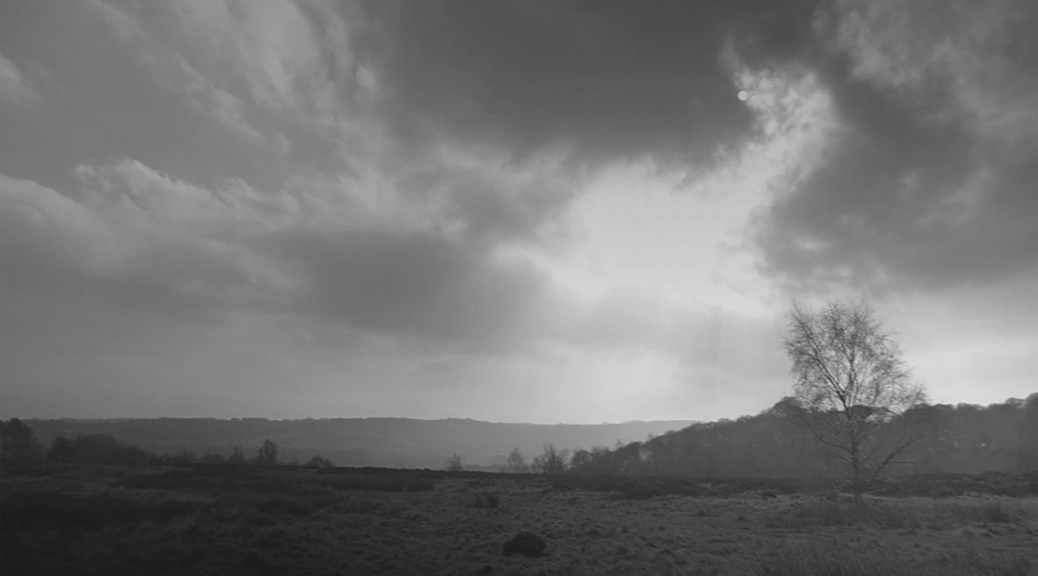

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [ ]:
print("Size of image: ",image.shape)
print("Datatype of image: ",image.dtype)
print("Channels of image: ",image.ndim)
print("Total number of pixels (Size of image):",image.size)

Size of image:  (576, 1038)
Datatype of image:  uint8
Channels of image:  2
Total number of pixels (Size of image): 597888


In [ ]:
freq = {}
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        pixel_value = image[i, j]
        if pixel_value in freq:
            freq[pixel_value] += 1
        else:
            freq[pixel_value] = 1

print(freq)

{np.uint8(106): 3532, np.uint8(105): 3721, np.uint8(107): 4051, np.uint8(109): 3745, np.uint8(108): 3776, np.uint8(111): 4744, np.uint8(112): 8050, np.uint8(114): 6919, np.uint8(113): 7171, np.uint8(116): 7023, np.uint8(115): 7197, np.uint8(117): 4478, np.uint8(118): 8157, np.uint8(119): 10536, np.uint8(120): 10098, np.uint8(121): 8520, np.uint8(122): 7720, np.uint8(123): 8367, np.uint8(124): 4042, np.uint8(125): 7218, np.uint8(126): 7197, np.uint8(128): 7203, np.uint8(129): 6329, np.uint8(130): 6211, np.uint8(132): 5503, np.uint8(134): 6366, np.uint8(133): 8041, np.uint8(127): 6813, np.uint8(131): 5281, np.uint8(137): 4929, np.uint8(135): 5736, np.uint8(138): 3914, np.uint8(139): 3894, np.uint8(140): 5215, np.uint8(141): 5058, np.uint8(142): 4821, np.uint8(146): 3175, np.uint8(144): 3991, np.uint8(145): 3738, np.uint8(148): 3716, np.uint8(143): 4425, np.uint8(147): 3493, np.uint8(136): 5083, np.uint8(149): 3309, np.uint8(150): 3253, np.uint8(151): 3093, np.uint8(152): 2755, np.uint8(1

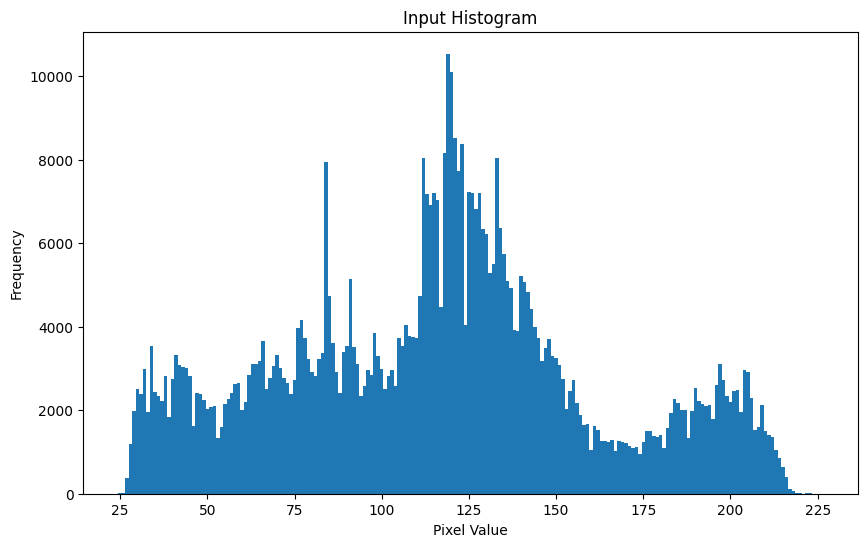

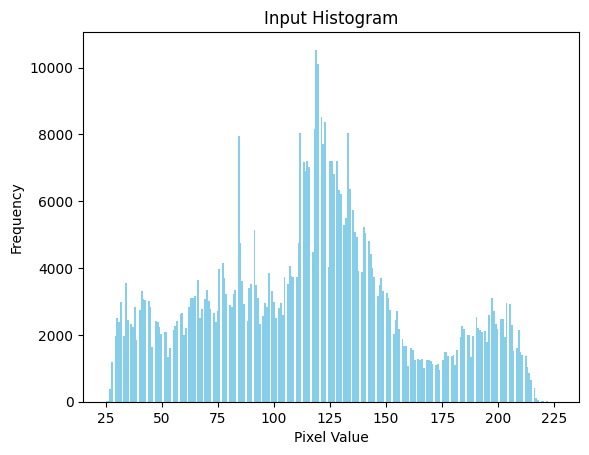

In [ ]:
sorted_freq = dict(sorted(freq.items()))

pixel_values = list(sorted_freq.keys())
frequencies = list(sorted_freq.values())

plt.figure(figsize=(10, 6))
plt.bar(pixel_values, frequencies, width=1.0)
plt.title("Input Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

# using hist function
plt.hist(image.reshape(-1), bins=256, color='skyblue')
plt.title("Input Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

### Histogram Stretching

In [ ]:
s_min = 0
s_max = 255

r_min = np.min(image)
r_max = np.max(image)

stretched_img = np.zeros(image.shape[:2], dtype="uint8")

def stretch(image, i, j):
    return ((s_max - s_min)/(r_max - r_min))*(image[i][j] - r_min) + s_min

print("r min = ",r_min)
print("r max = ",r_max)

r min =  25
r max =  226


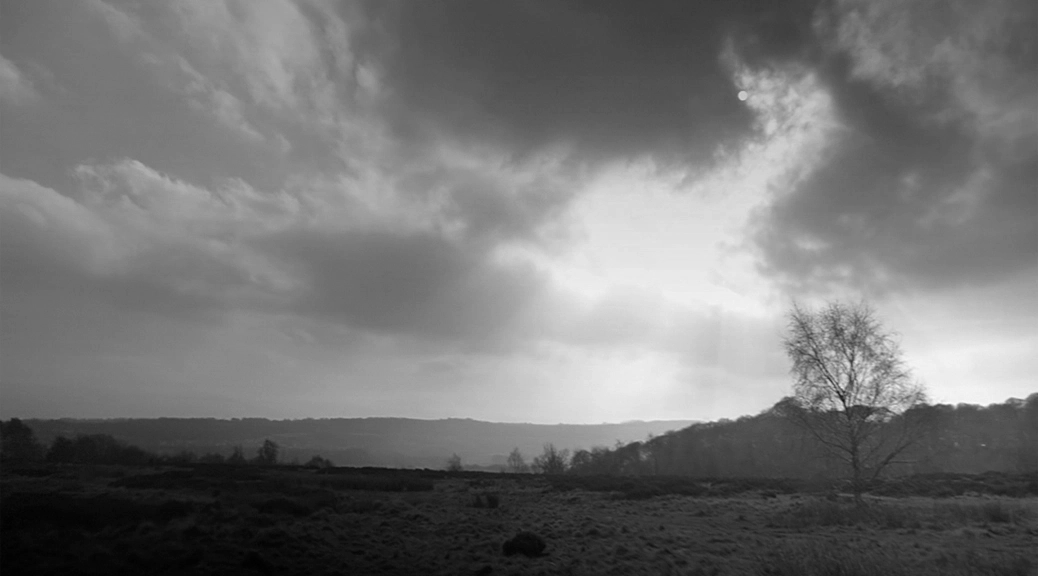

In [ ]:
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
     stretched_img[i,j] = stretch(image, i, j)

cv2_imshow(stretched_img)

In [ ]:
print(f"Min value in stretched image: {np.min(stretched_img)}")
print(f"Max value in stretched image: {np.max(stretched_img)}")

Min value in stretched image: 0
Max value in stretched image: 255


In [ ]:
modified_freq = {}
for i in range(stretched_img.shape[0]):
    for j in range(stretched_img.shape[1]):
        pixel_value = stretched_img[i, j]
        if pixel_value in modified_freq:
            modified_freq[pixel_value] += 1
        else:
            modified_freq[pixel_value] = 1

print(modified_freq)

{np.uint8(102): 3532, np.uint8(101): 3721, np.uint8(104): 4051, np.uint8(106): 3745, np.uint8(105): 3776, np.uint8(109): 4744, np.uint8(110): 8050, np.uint8(112): 6919, np.uint8(111): 7171, np.uint8(115): 7023, np.uint8(114): 7197, np.uint8(116): 4478, np.uint8(117): 8157, np.uint8(119): 10536, np.uint8(120): 10098, np.uint8(121): 8520, np.uint8(123): 7720, np.uint8(124): 8367, np.uint8(125): 4042, np.uint8(126): 7218, np.uint8(128): 7197, np.uint8(130): 7203, np.uint8(131): 6329, np.uint8(133): 6211, np.uint8(135): 5503, np.uint8(138): 6366, np.uint8(137): 8041, np.uint8(129): 6813, np.uint8(134): 5281, np.uint8(142): 4929, np.uint8(139): 5736, np.uint8(143): 3914, np.uint8(144): 3894, np.uint8(145): 5215, np.uint8(147): 5058, np.uint8(148): 4821, np.uint8(153): 3175, np.uint8(150): 3991, np.uint8(152): 3738, np.uint8(156): 3716, np.uint8(149): 4425, np.uint8(154): 3493, np.uint8(140): 5083, np.uint8(157): 3309, np.uint8(158): 3253, np.uint8(159): 3093, np.uint8(161): 2755, np.uint8(1

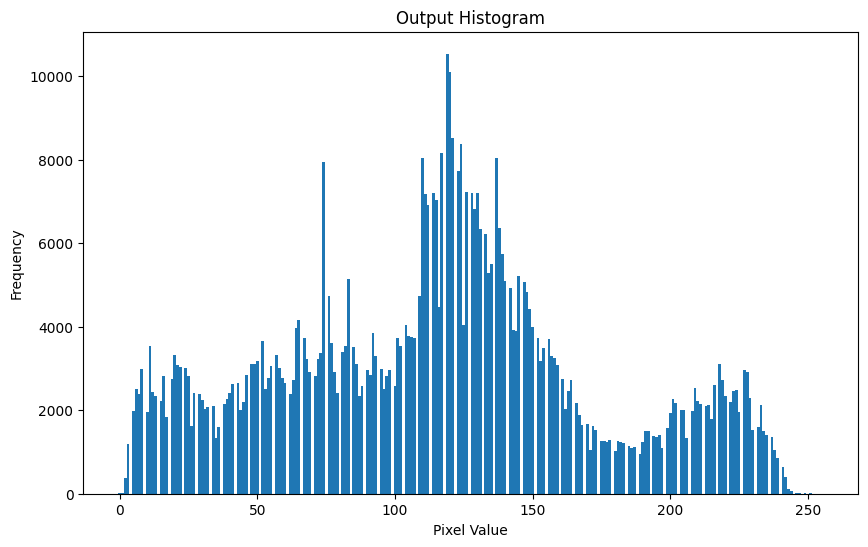

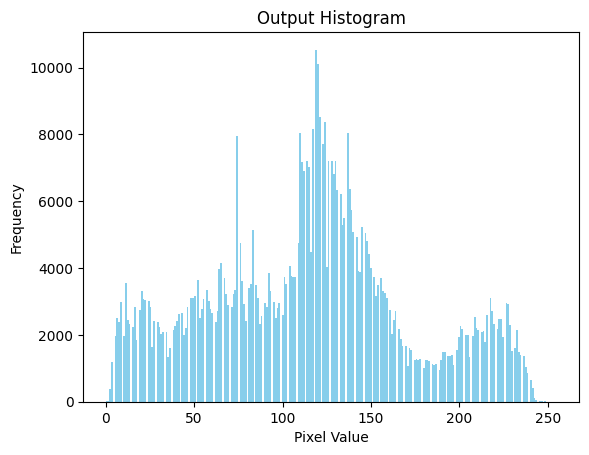

In [ ]:
sorted_freq = dict(sorted(modified_freq.items()))

pixel_values = list(sorted_freq.keys())
frequencies = list(sorted_freq.values())

plt.figure(figsize=(10, 6))
plt.bar(pixel_values, frequencies, width=1.0)
plt.title("Output Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

# using hist function
plt.hist(stretched_img.reshape(-1), bins=256, color='skyblue')
plt.title("Output Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

### Histogram Equalization

In [ ]:
sorted_freq = dict(sorted(freq.items()))
total_freq = np.sum(list(sorted_freq.values()))
print(f"Total Frequency: {total_freq}")

Total Frequency: 597888


In [ ]:
pdf = {}
for pixel_value, frequency in sorted_freq.items():
    pdf[pixel_value] = frequency / total_freq
print(f"PDF: {pdf}")

cdf = {}
cumulative_frequency = 0
for pixel_value, probability in pdf.items():
    cumulative_frequency += probability
    cdf[pixel_value] = round(cumulative_frequency*255)
print(f"Rounded (L-1)*CDF: {cdf}")

PDF: {np.uint8(25): np.float64(1.8398094626418327e-05), np.uint8(26): np.float64(2.1743202740312567e-05), np.uint8(27): np.float64(0.0006322254335260116), np.uint8(28): np.float64(0.001985321665596232), np.uint8(29): np.float64(0.0033016217084136158), np.uint8(30): np.float64(0.004186402804538643), np.uint8(31): np.float64(0.0039990767501605655), np.uint8(32): np.float64(0.004990901305930208), np.uint8(33): np.float64(0.0032848961678441447), np.uint8(34): np.float64(0.005924186469706701), np.uint8(35): np.float64(0.004076014236780133), np.uint8(36): np.float64(0.003912103939199315), np.uint8(37): np.float64(0.0037231053307642905), np.uint8(38): np.float64(0.004731655427103404), np.uint8(39): np.float64(0.003077499464782702), np.uint8(40): np.float64(0.004586143224149005), np.uint8(41): np.float64(0.00556458734746307), np.uint8(42): np.float64(0.005159829265681867), np.uint8(43): np.float64(0.005069511346606722), np.uint8(44): np.float64(0.005054458360094198), np.uint8(45): np.float64(0

In [ ]:
equalized_img = np.zeros(image.shape[:2], dtype="uint8")

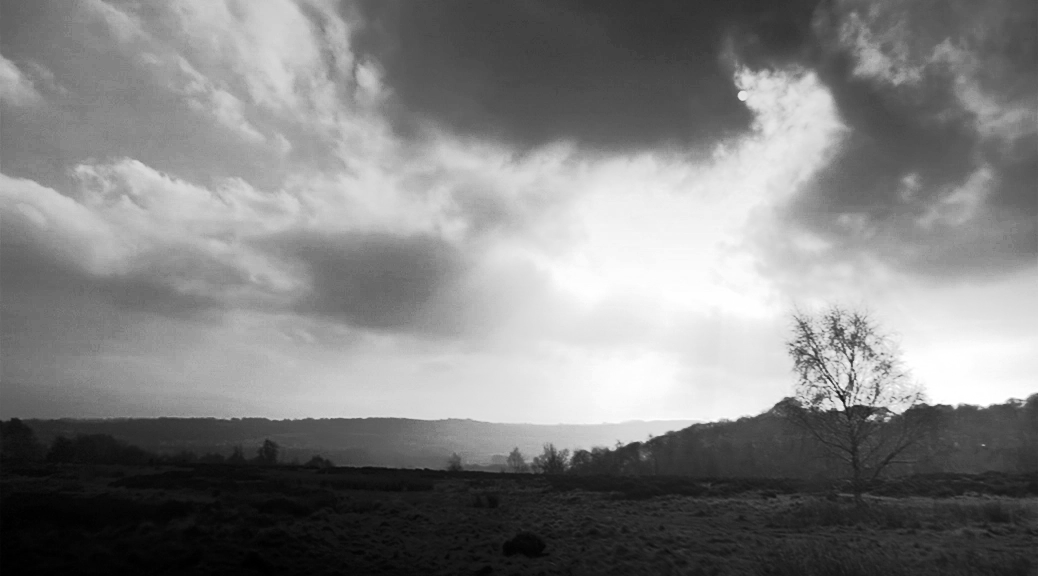

In [ ]:
for i in range(image.shape[0]):
  for j in range(image.shape[1]):
    equalized_img[i][j] = cdf[image[i][j]]

cv2_imshow(equalized_img)

Pixels & Frequency: {0: 378, 1: 1187, 2: 1974, 3: 2503, 4: 2391, 5: 2984, 6: 1964, 7: 3542, 8: 2437, 9: 2339, 10: 2226, 11: 2829, 12: 1840, 13: 2742, 15: 3327, 16: 3085, 17: 3031, 19: 3022, 20: 2824, 21: 1626, 22: 2422, 23: 2394, 24: 2023, 25: 2081, 26: 2101, 27: 1597, 28: 2151, 29: 2270, 30: 2404, 32: 2636, 33: 2655, 34: 2200, 36: 2848, 37: 3106, 38: 3105, 40: 3171, 41: 3651, 42: 2517, 43: 2763, 45: 3061, 46: 3332, 47: 3011, 49: 2778, 50: 2661, 51: 2386, 52: 2715, 54: 3962, 55: 4166, 57: 3718, 58: 3232, 60: 2906, 61: 2825, 62: 3231, 64: 3358, 67: 7946, 69: 4737, 71: 3621, 72: 2918, 73: 2411, 74: 3402, 76: 3528, 78: 5132, 80: 3508, 81: 3099, 82: 2338, 83: 2572, 84: 2968, 85: 2848, 87: 3844, 88: 3305, 90: 2986, 91: 2500, 92: 2819, 93: 2962, 94: 2587, 96: 3721, 97: 3532, 99: 4051, 101: 3776, 102: 3745, 104: 3728, 106: 4744, 109: 8050, 113: 7171, 115: 6919, 119: 7197, 122: 7023, 123: 4478, 127: 8157, 131: 10536, 136: 10098, 139: 8520, 143: 7720, 146: 8367, 148: 4042, 151: 7218, 154: 7197,

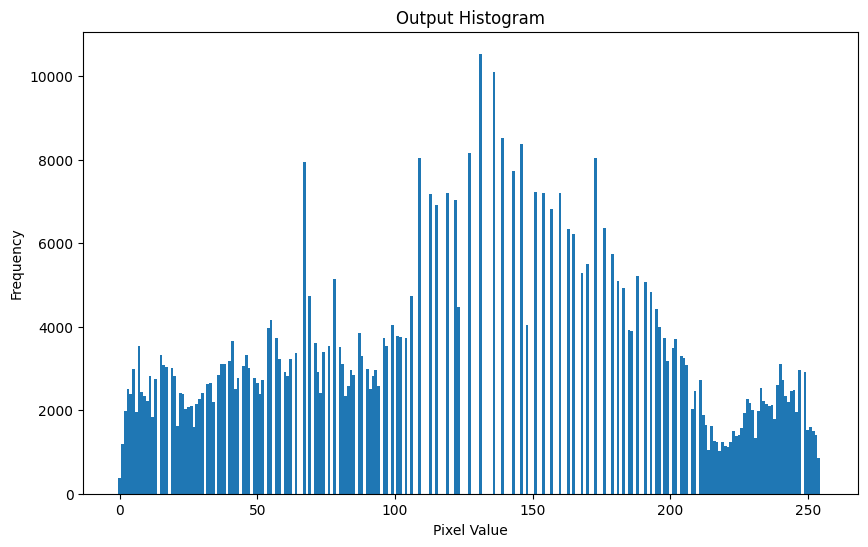

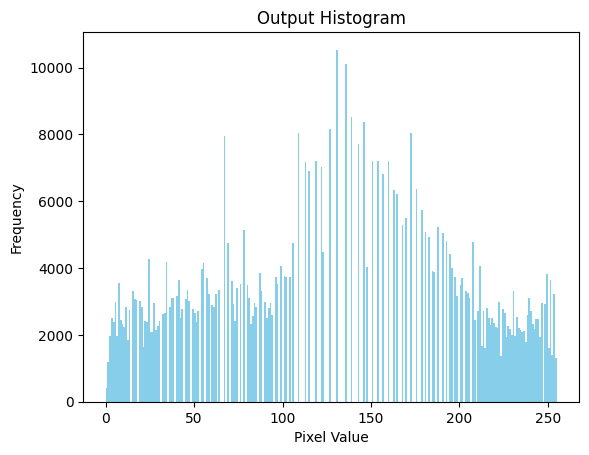

In [ ]:
equalized_freq = {}
for pixel_value, new_pixel_value in cdf.items():
    if pixel_value in sorted_freq:
        equalized_freq[new_pixel_value] = sorted_freq[pixel_value]

print(f"Pixels & Frequency: {equalized_freq}")

pixel_values = list(equalized_freq.keys())
frequencies = list(equalized_freq.values())

plt.figure(figsize=(10, 6))
plt.bar(pixel_values, frequencies, width=1.0)
plt.title("Output Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

# using hist function
plt.hist(equalized_img.reshape(-1), bins=256, color='skyblue')
plt.title("Output Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()